# House Prices - Advanced Regression Techniques

The purpose of this EDA notebook is to explore advanced regression techniques to predict housing prices using the Ames, Iowa dataset provided by Kaggle.  I will explore the data to understand the most important features that affect home prices and check for missing values or outliers.

## Dataset Overview
### Brief descrption of the columns in this dataset: 

This dataset contains from Kaggle contains information on 1,460 residential homes in Ames, Iowa, collected during the years 2006 to 2010. The dataset includes 81 features that describe different aspects of each house.


Here's a brief version of what you'll find in the data description file.

- **SalePrice**: the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/Users/sa3/Desktop/House Prices - Advanced Regression Techniques/Data/train.csv')

# Display basic info and first few rows
df_info = df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Exploratory Data Analysis (EDA):

- Perform univariate, bivariate, and multivariate analysis.
- Generate relevant graphs to formulate hypotheses.
- Using visualizations to explore patterns and relationships.

### Univariate Analysis - Histogram & Countplot
1. **YearSld distribution is relatively flat**  
Sales volume has no significant time trend over the years observed.

2. **SalePrice: is right-skewed**  
House prices are not normally distributed. A log transformation may improve modeling performance.

3. **Neighborhood counts vary widely**  
Some neighborhoods may be underrepresented, potentially introducing sampling bias.

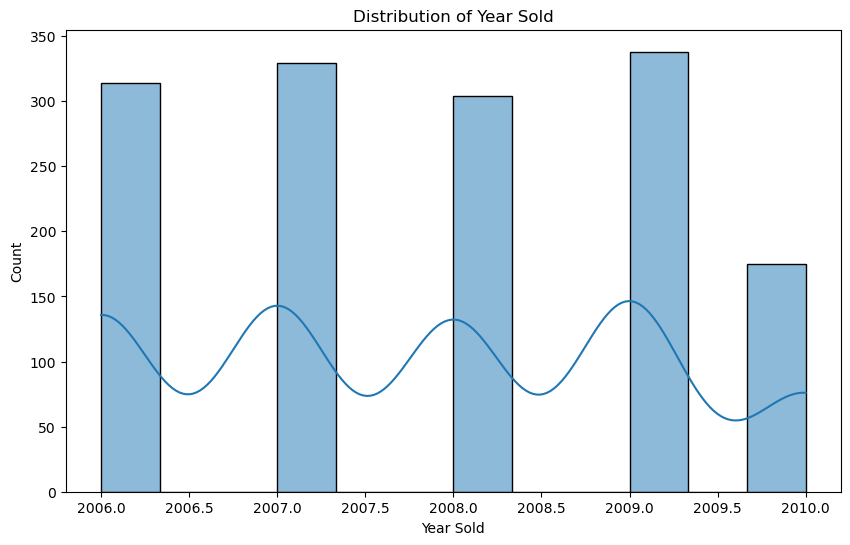

In [5]:
# Distribution of year houses were sold
plt.figure(figsize=(10, 6)) 
sns.histplot(df["YrSold"], kde=True)
plt.xlabel('Year Sold')
plt.ylabel('Count')
plt.title('Distribution of Year Sold')
plt.show()

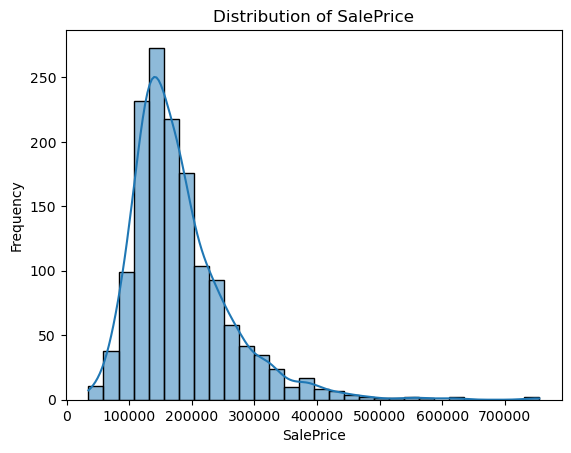

In [6]:
# Plot the distribution of SalePrice
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


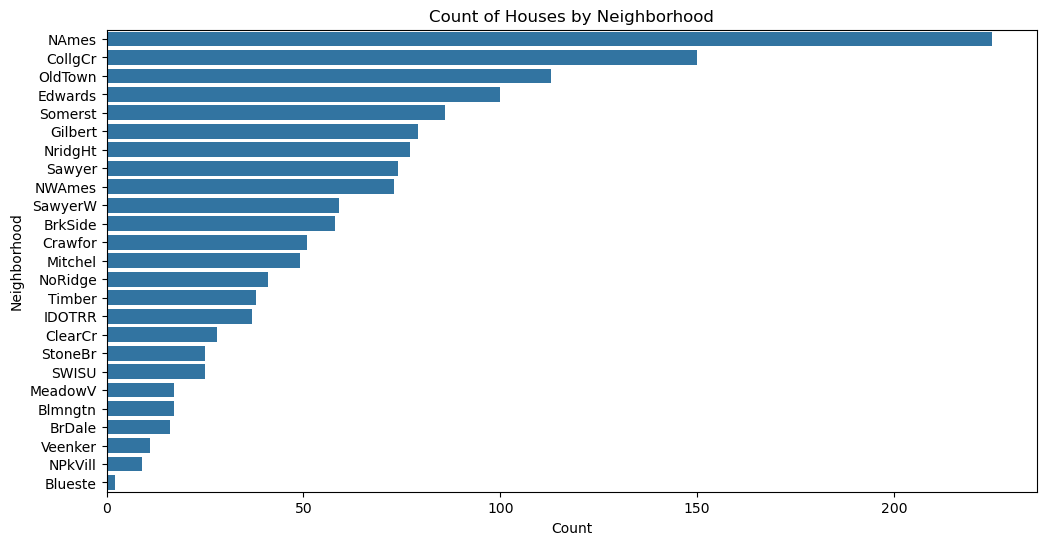

In [7]:
# Count of Houses by Neighborhood
plt.figure(figsize=(12, 6))
sns.countplot(y='Neighborhood', data=df, order=df['Neighborhood'].value_counts().index)
plt.title('Count of Houses by Neighborhood')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.show()

- Neighborhood has large variation in counts
- Hypothesis: Some neighborhoods may be underrepresented and could introduce bias.

### Bivariate Analysis - Barplot & Scatterplot

1. **GrLivArea vs SalePrice**  
More above-ground living area is strongly associated with higher sale prices.

2. **GarageCars vs SalePrice**  
Houses with more garage spaces tend to have higher sale prices, especially at 2+ cars.


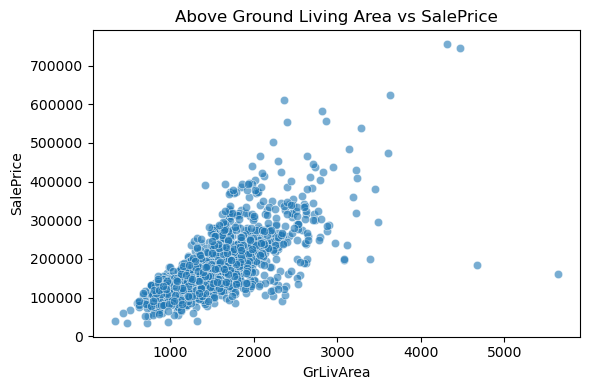

In [8]:
#Scatter plot: GrLivArea vs SalePrice
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", alpha=0.6)
plt.title("Above Ground Living Area vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.tight_layout()
plt.show()

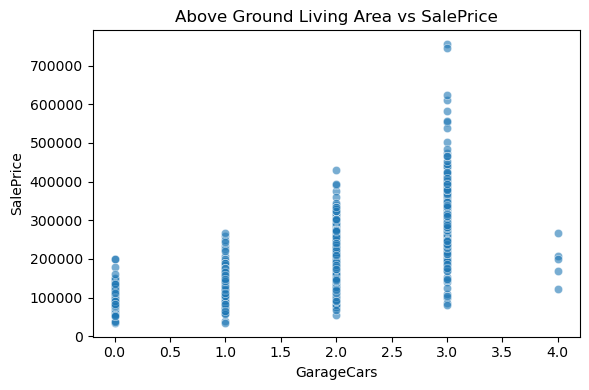

In [9]:
#Scatter plot: GarageCars vs SalePrice
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="GarageCars", y="SalePrice", alpha=0.6)
plt.title("Above Ground Living Area vs SalePrice")
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.tight_layout()
plt.show()

/var/folders/z4/2rstd0cd6mbfdq_6f5c_3m_r0000gn/T/ipykernel_7936/1710846865.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_range_counts = df.groupby(['YearRange', 'Neighborhood']).size().reset_index(name='Count')


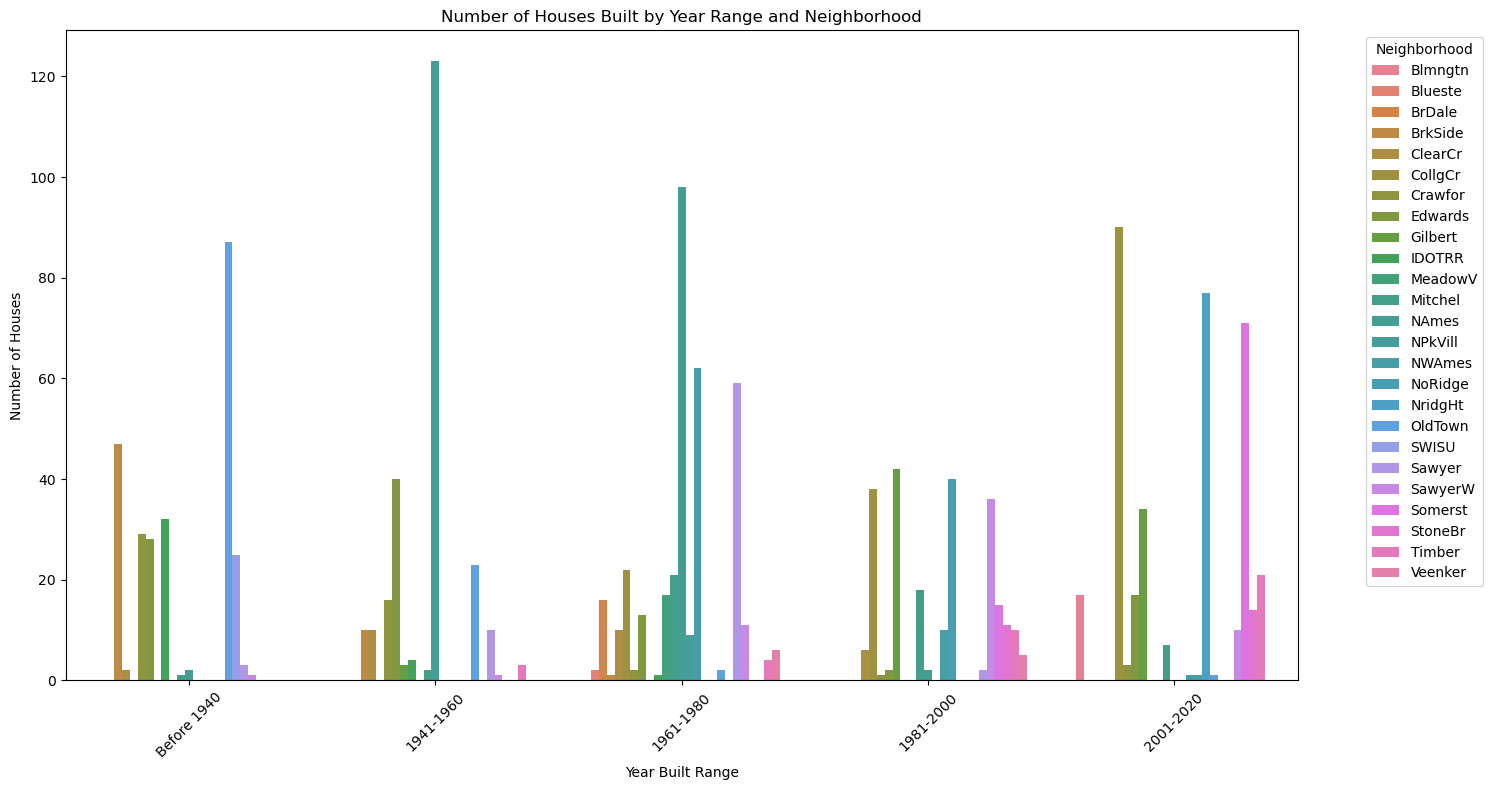

In [10]:
#Create year ranges
bins = [1870, 1940, 1960, 1980, 2000, 2020]
labels = ['Before 1940', '1941-1960', '1961-1980', '1981-2000', '2001-2020']
df['YearRange'] = pd.cut(df['YearBuilt'], bins=bins, labels=labels)
year_range_counts = df.groupby(['YearRange', 'Neighborhood']).size().reset_index(name='Count')

#Create the barplot
plt.figure(figsize=(15, 8)) 
sns.barplot(data=year_range_counts, x='YearRange', y='Count', hue='Neighborhood')
plt.title('Number of Houses Built by Year Range and Neighborhood')
plt.xlabel('Year Built Range')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45) 
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()


- Mitchel had peak construction (123 houses) in 1841-1860
- OldTown developed significantly before 1840
- NWAmes boomed in 1961-1980
- Recent construction (2001-2020) concentrated in ClearCr, NRidgHt, and SawyerW
- Development clearly shifted between neighborhoods over different eras

/var/folders/z4/2rstd0cd6mbfdq_6f5c_3m_r0000gn/T/ipykernel_7936/2840407634.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sold_range_counts = df.groupby(['SoldYearRange', 'Neighborhood']).size().reset_index(name='Count')


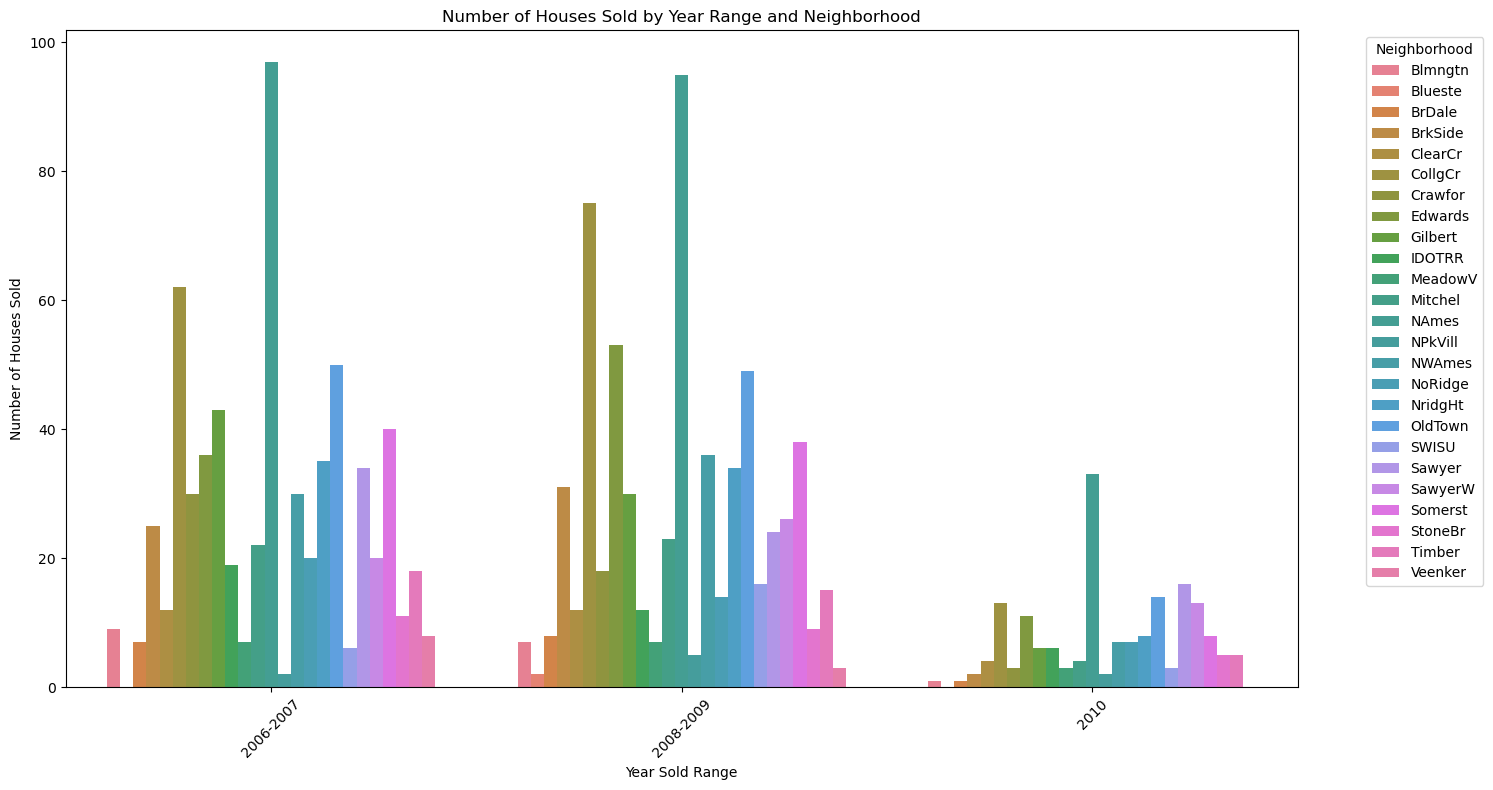

In [11]:
#Create year ranges for Year Sold
bins = [2005, 2007, 2009, 2011]
labels = ['2006-2007', '2008-2009', '2010']
df['SoldYearRange'] = pd.cut(df['YrSold'], bins=bins, labels=labels, include_lowest=True)
sold_range_counts = df.groupby(['SoldYearRange', 'Neighborhood']).size().reset_index(name='Count')

#Plot the grouped data
plt.figure(figsize=(15, 8))
sns.barplot(data=sold_range_counts, x='SoldYearRange', y='Count', hue='Neighborhood')
plt.title('Number of Houses Sold by Year Range and Neighborhood')
plt.xlabel('Year Sold Range')
plt.ylabel('Number of Houses Sold')
plt.xticks(rotation=45)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- Mitchel had highest sales (~95 houses) in both 2006-2007 and 2008-2009 
- ClearCr showed strong sales, peaking in 2008-2009 (~75 houses)
- Overall sales volume dropped significantly in 2010 across most neighborhoods
- NRidgHt maintained relatively consistent sales through all periods
- The 2008-2009 housing crisis affected neighborhoods differently
- Sales patterns varied distinctly between neighborhoods

### 3. Multivariate Analysis - Heatmap, Scatterplot & Pairplot

1. **Overall Quality is the strongest predictor of SalePrice**
High-quality homes consistently sell for more; strong correlation (0.79).
2. **Living Area shows a strong positive correlation with SalePrice**
Larger homes generally command higher prices; correlation of 0.71.
3. **Garage size and capacity influence price**
Both garage area (0.62) and number of cars (0.64) are strongly associated with higher prices.
4. **Basement and 1st floor size are equally important**
Both features show a moderate-to-strong positive relationship with sale price (0.61).
5. **Scatterplot matrix shows clear linear trends**
Key features like living area and garage size linearly increase with price.
6. **NoRidge contains the highest-value properties**
Many homes exceed $700,000, with some over $800,000.
7. **High-priced homes are concentrated in a few neighborhoods**
NRidgHt, StoneBr, and ClearCr also have homes in the $500k–$600k range.
8. **Most properties are mid-sized and mid-priced**
Majority cluster between 1,000–2,500 sq ft and $100k–$300k.
9. **Price per square foot varies significantly by neighborhood**
Neighborhood plays a key role in value, independent of size.
10. **Neighborhood value tiers are distinct**
High-end: NoRidge, Veenker, Crawfor; Mid-range: Somerst, NWAmes, Mitchel; Low-end: SWISU, Blueste, BrDale, BlmngIn.

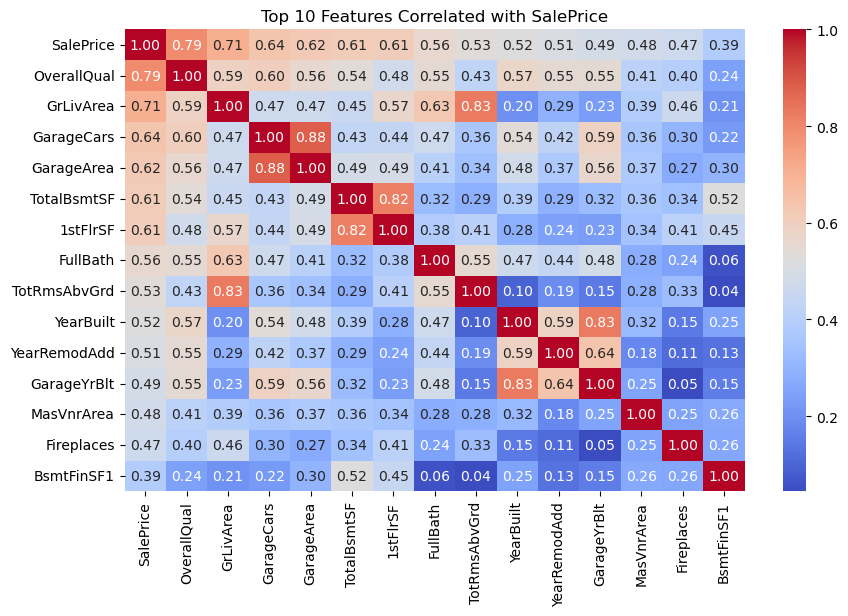

In [12]:
numeric_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
top_corr_features = correlation_matrix['SalePrice'].abs().sort_values(ascending=False).head(15).index
top_corr_data = numeric_data[top_corr_features]
plt.figure(figsize=(10, 6))
sns.heatmap(top_corr_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 10 Features Correlated with SalePrice')
plt.show()

- Overall quality has the strongest correlation with sale price (0.79)
- Ground living area has the second highest correlation (0.71)
- Garage cars (0.64) and garage area (0.62) both strongly influence price
- Total basement square footage (0.61) and 1st floor square footage (0.61) are equally important

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
target_corr = correlation_matrix["SalePrice"]
high_corr = target_corr[target_corr >= 0.5].sort_values(ascending=False)
print(high_corr.index.tolist())

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


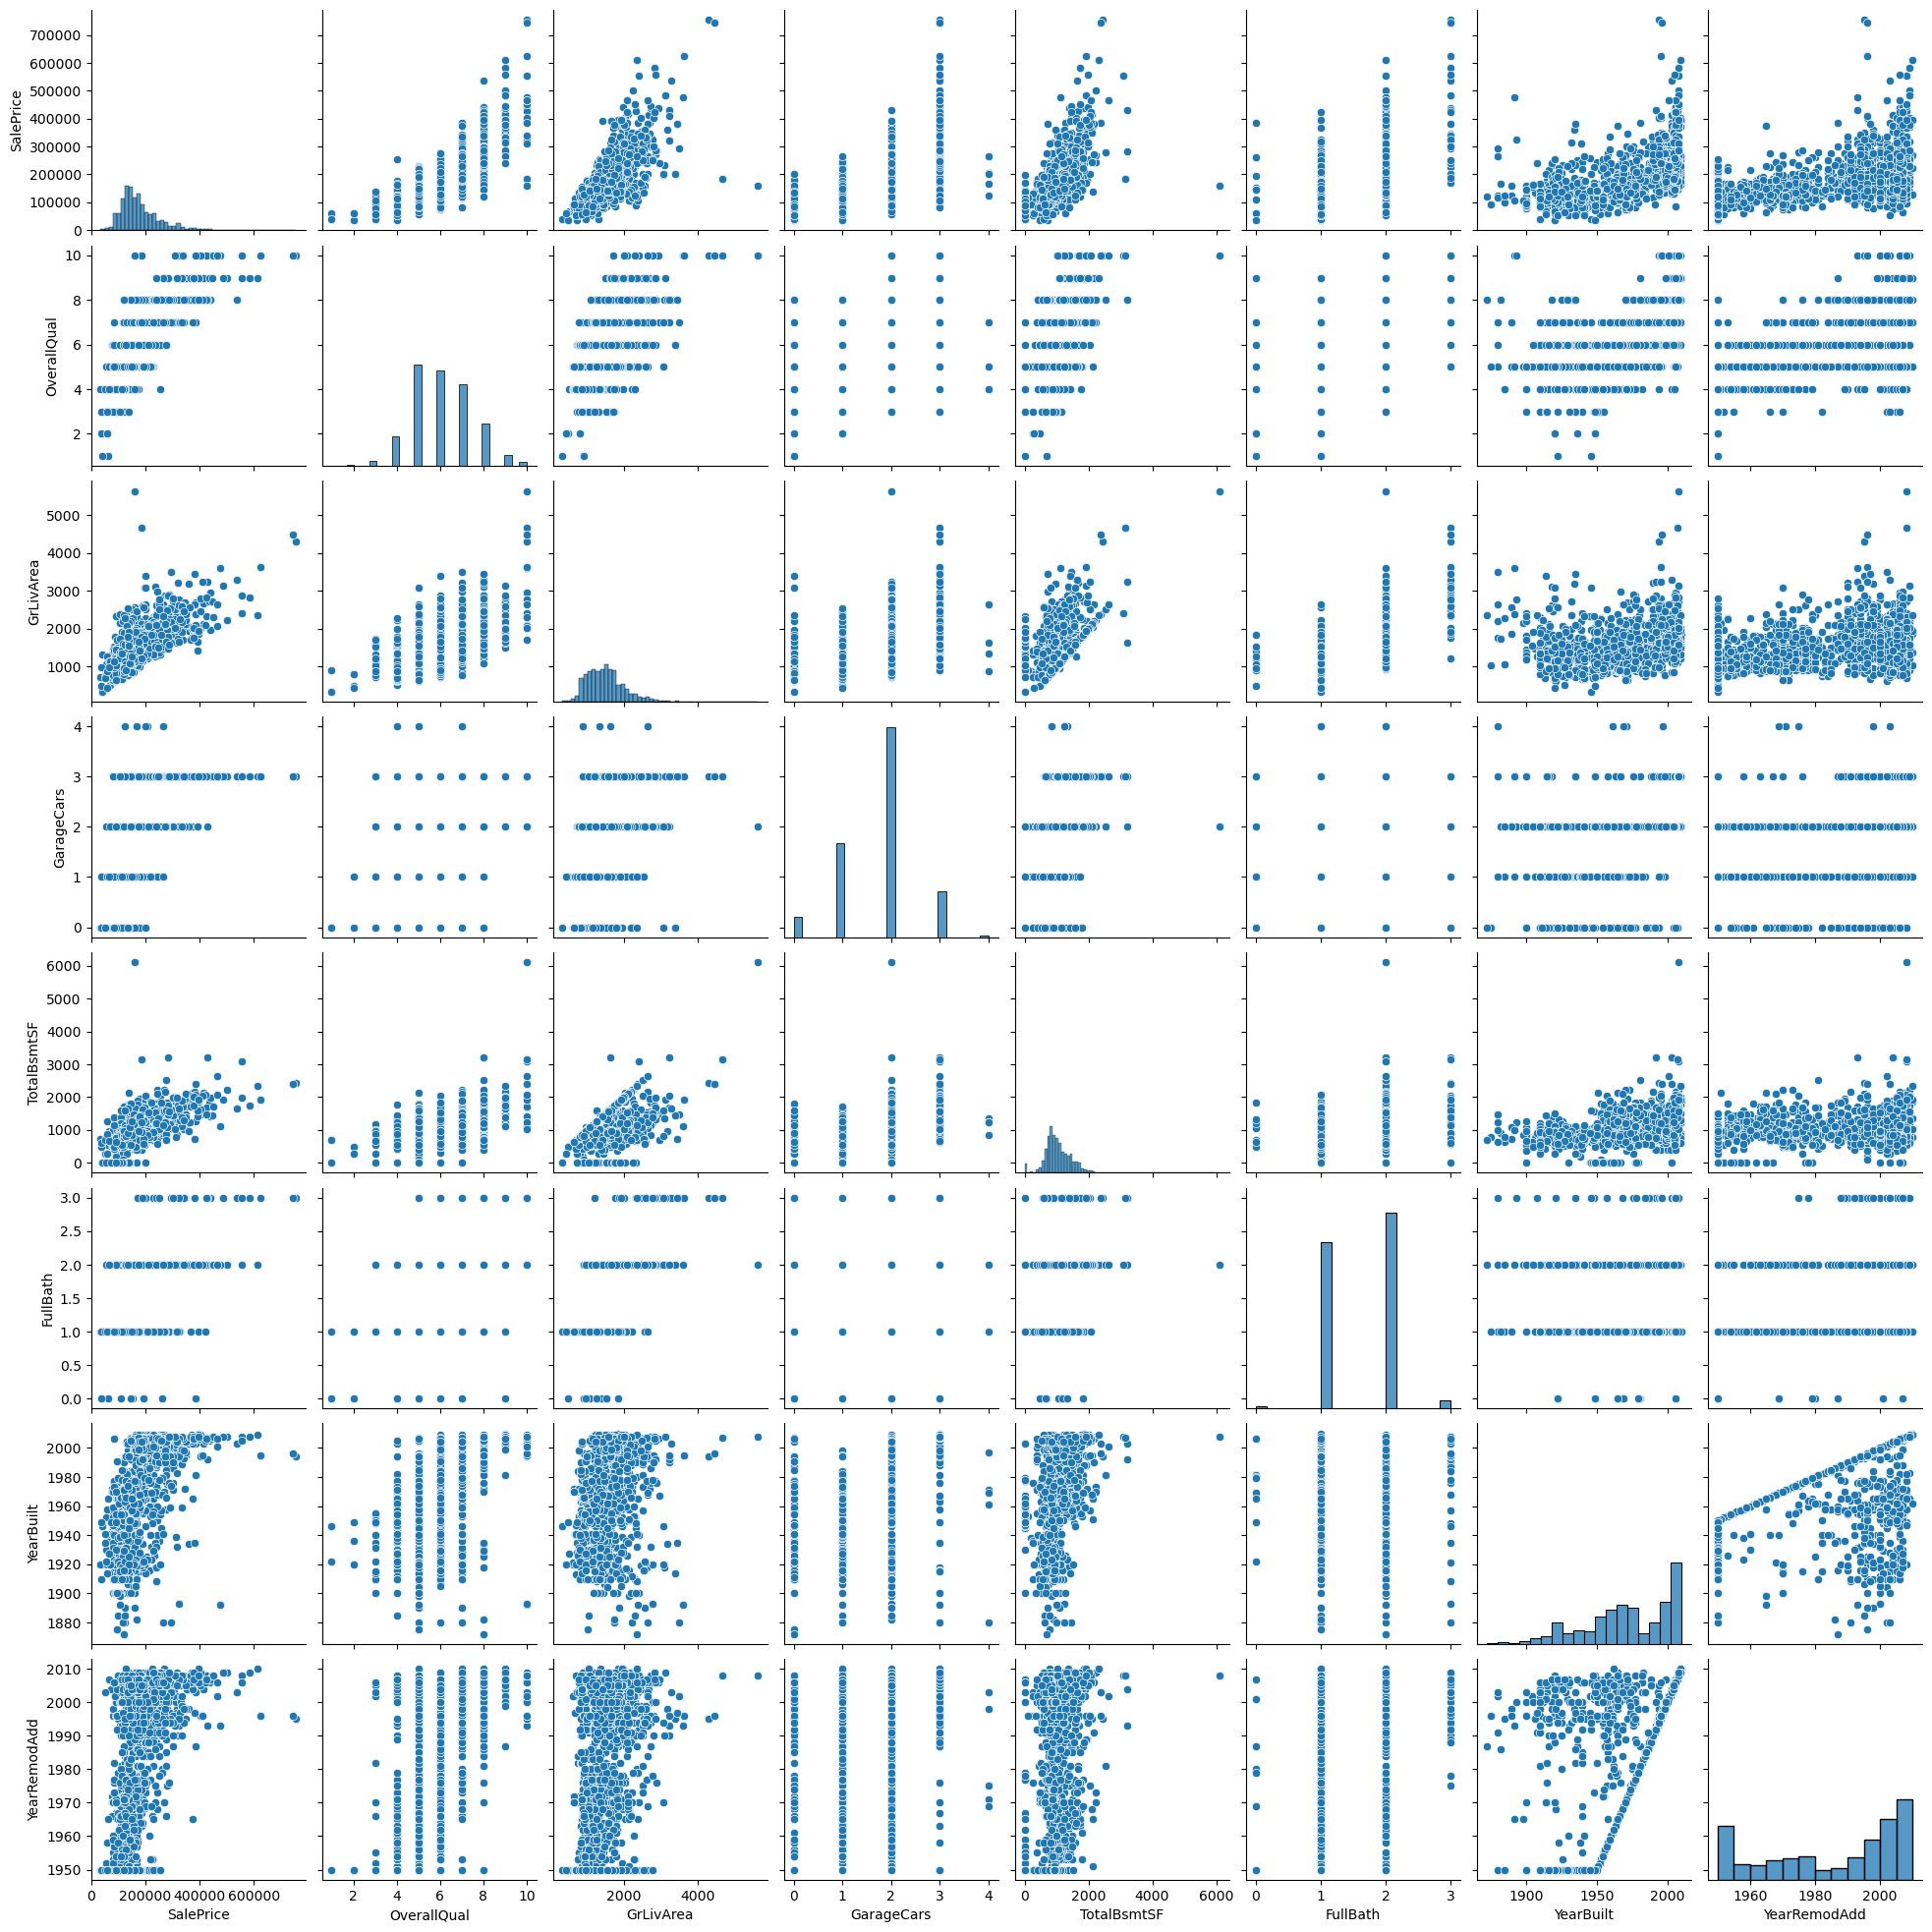

In [14]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']
sns.pairplot(df[cols], height=2.5)
plt.show()

- Scatterplot matrix showing relationships between multiple housing features and sale price.

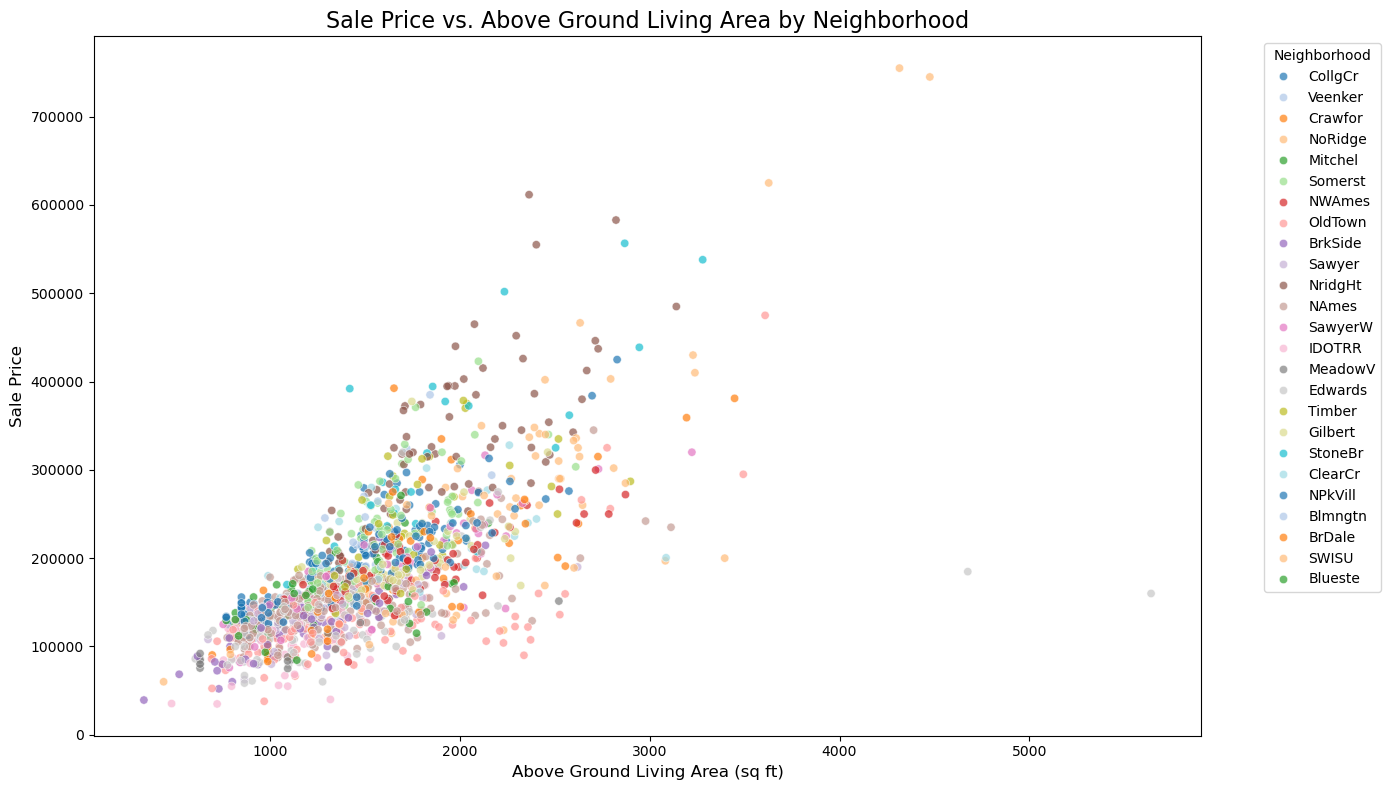

In [15]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='Neighborhood', palette='tab20', alpha=0.7)
plt.title('Sale Price vs. Above Ground Living Area by Neighborhood', fontsize=16)
plt.xlabel('Above Ground Living Area (sq ft)', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

- A clear positive correlation exists between living area and sale price
- The highest-priced homes (>$700,000) are in the NoRidge neighborhood
- NRidgHt has several high-value properties in the $500,000-$600,000 range
- StoneBr and ClearCr also contain some higher-end properties
- Most homes cluster between 1,000-2,500 sq ft and $100,000-$300,000
- Price per square foot varies significantly between neighborhoods

/var/folders/z4/2rstd0cd6mbfdq_6f5c_3m_r0000gn/T/ipykernel_7936/1208117328.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Neighborhood', y='SalePrice', data=df, palette='coolwarm')


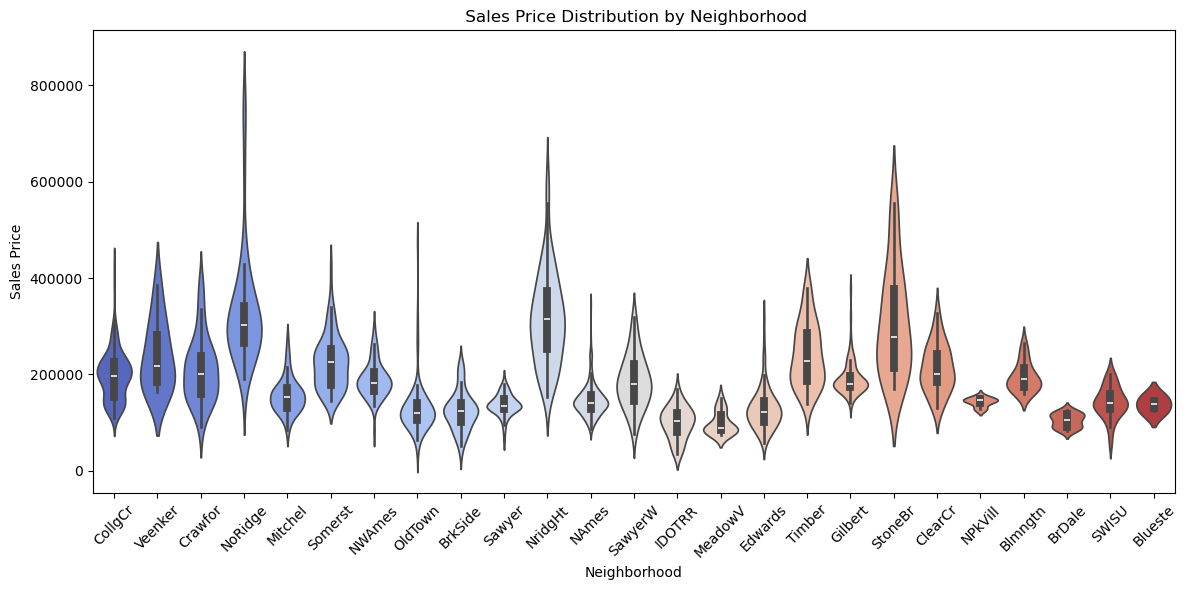

In [16]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Neighborhood', y='SalePrice', data=df, palette='coolwarm')
plt.title(' Sales Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sales Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- NoRidge has the highest median price and maximum values, with some homes exceeding $800,000
- NRidgHt and StoneBr also show high median prices with maximum values above $600,000
- Most expensive neighborhoods (blue/left): NoRidge, Veenker, Crawfor
- Middle-range neighborhoods (gray/center): Somerst, NWAmes, Mitchel
- Least expensive neighborhoods (red/right): SWISU, Blueste, BrDale, BlmngIn